<a href="https://colab.research.google.com/github/Tapanmittal13/Data_Science/blob/master/Assignment_20_Transfer_learning_Res18or34.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip install tensorflow-gpu==2.0.0

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils

In [0]:
tf.__version__

'1.15.0-rc3'

In [0]:
tf.executing_eagerly()

False

In [0]:
from tensorflow.keras.datasets import cifar100

In [0]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

In [0]:
Y_train = utils.to_categorical(y_train, 100)
Y_test = utils.to_categorical(y_test, 100)

In [0]:
#Ref: https://github.com/qubvel/classification_models
#!pip install image-classifiers==1.0.0b1

In [0]:
!pip install git+https://github.com/qubvel/classification_models.git

  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-54u8tyzh
  Running command git clone -q https://github.com/qubvel/classification_models.git /tmp/pip-req-build-54u8tyzh
  Running command git submodule update --init --recursive -q
  Created wheel for image-classifiers: filename=image_classifiers-1.0.0-cp36-none-any.whl size=19950 sha256=fcc2c31c12be17ea511d3cc91eb8f0f88f823c79cd3af55ba45f657626d1761b
  Stored in directory: /tmp/pip-ephem-wheel-cache-gx694p31/wheels/de/2b/fd/29a6d33edb8c28bc7d94e95ea1d39c9a218ac500a3cfb1b197
Successfully built image-classifiers


In [0]:
from classification_models.tfkeras import Classifiers

In [0]:
ResNet18, preprocess_input = Classifiers.get('resnet18')

In [0]:
base_model=ResNet18((32, 32, 3), include_top=False,weights='imagenet')

In [0]:
base_model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 32, 32, 3)    9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_36 (ZeroPadding2 (None, 38, 38, 3)    0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 16, 16, 64)   9408        zero_padding2d_36[0][0]          
____________________________________________________________________________________________

In [0]:
for (i, layer) in enumerate(base_model.layers):
  print("[INFO] {}\t{}".format(i, layer.__class__.__name__))

[INFO] 0	InputLayer
[INFO] 1	BatchNormalization
[INFO] 2	ZeroPadding2D
[INFO] 3	Conv2D
[INFO] 4	BatchNormalization
[INFO] 5	Activation
[INFO] 6	ZeroPadding2D
[INFO] 7	MaxPooling2D
[INFO] 8	BatchNormalization
[INFO] 9	Activation
[INFO] 10	ZeroPadding2D
[INFO] 11	Conv2D
[INFO] 12	BatchNormalization
[INFO] 13	Activation
[INFO] 14	ZeroPadding2D
[INFO] 15	Conv2D
[INFO] 16	Conv2D
[INFO] 17	Add
[INFO] 18	BatchNormalization
[INFO] 19	Activation
[INFO] 20	ZeroPadding2D
[INFO] 21	Conv2D
[INFO] 22	BatchNormalization
[INFO] 23	Activation
[INFO] 24	ZeroPadding2D
[INFO] 25	Conv2D
[INFO] 26	Add
[INFO] 27	BatchNormalization
[INFO] 28	Activation
[INFO] 29	ZeroPadding2D
[INFO] 30	Conv2D
[INFO] 31	BatchNormalization
[INFO] 32	Activation
[INFO] 33	ZeroPadding2D
[INFO] 34	Conv2D
[INFO] 35	Conv2D
[INFO] 36	Add
[INFO] 37	BatchNormalization
[INFO] 38	Activation
[INFO] 39	ZeroPadding2D
[INFO] 40	Conv2D
[INFO] 41	BatchNormalization
[INFO] 42	Activation
[INFO] 43	ZeroPadding2D
[INFO] 44	Conv2D
[INFO] 45	Add
[INF

In [0]:
# for i in range(len(base_model.layers)):
#   if i>45:
#     base_model._layers.pop()

In [0]:
# output = base_model.layers[-1].output

In [0]:
# output = keras.layers.Flatten()(output)
# ResNet18 = keras.Model(base_model.input, output)

# ResNet18.trainable = False
# for layer in ResNet18.layers:
#     layer.trainable = False

# ResNet18.trainable = False

# # set_trainable = False
# # for layer in ResNet34.layers:
# #     if layer.name in ['block5_conv1', 'block4_conv1']:
# #         set_trainable = True
# #     if set_trainable:
# #         layer.trainable = True
# #     else:
# #         layer.trainable = False
        
# # layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
# # pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable']) 

# import pandas as pd
# pd.set_option('max_colwidth', -1)
# layers = [(layer, layer.name, layer.trainable) for layer in ResNet18.layers]
# pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable']) 

(1, 1, 1, 512)


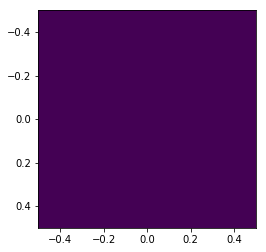

In [0]:
import matplotlib.pyplot as plt

bottleneck_feature_example = base_model.predict(X_train[0:1])
print(bottleneck_feature_example.shape)
plt.imshow(bottleneck_feature_example[0][:,:,0])

In [0]:
for layer in base_model.layers:
 layer.trainable = True

# for layer in base_model.layers[40:]:
#   layer.trainable = True

import pandas as pd
pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in base_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable']) 

,Layer Type,Layer Name,Layer Trainable
0,<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f8e8ed86dd8>,data,True
1,<tensorflow.python.keras.layers.normalization.BatchNormalization object at 0x7f8e8ed86278>,bn_data,True
2,<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7f8e8ed86e10>,zero_padding2d_36,True
3,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f8e8ed86080>,conv0,True
4,<tensorflow.python.keras.layers.normalization.BatchNormalization object at 0x7f8e8ed20ba8>,bn0,True
5,<tensorflow.python.keras.layers.core.Activation object at 0x7f8e9051eac8>,relu0,True
6,<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7f8e8ed230f0>,zero_padding2d_37,True
7,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f8e9051eb00>,pooling0,True
8,<tensorflow.python.keras.layers.normalization.BatchNormalization object at 0x7f8e90549780>,stage1_unit1_bn1,True
9,<tensorflow.python.keras.layers.core.Activation object at 0x7f8e90549dd8>,stage1_unit1_relu1,True


In [0]:
print(base_model.output)

Tensor("relu1_2/Relu:0", shape=(?, 1, 1, 512), dtype=float32)


In [0]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD

# input_shape = base_model.layers[45].output_shape

# model = Sequential()
# model.add(base_model)

# model.add(InputLayer(input_shape=(input_shape)))
# # model.add(Dense(512, activation='relu', input_dim=input_shape))
# # model.add(Dropout(0.3))
# # model.add(Dense(512, activation='relu'))
# # model.add(Dropout(0.3))
# model.add(Dense(100, activation='softmax'))

# model.summary()

x=base_model.layers[85].output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
#x = Dropout(0.5)(x)
x = Dense(512, activation="relu")(x)
predictions = Dense(100, activation="softmax")(x)

#creating the final model 
model = keras.Model(base_model.input, predictions)


In [0]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 32, 32, 3)    9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_36 (ZeroPadding2 (None, 38, 38, 3)    0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 16, 16, 64)   9408        zero_padding2d_36[0][0]          
____________________________________________________________________________________________

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(X_train, Y_train, batch_size=128)
val_generator = val_datagen.flow(X_test, Y_test, batch_size=128)

In [0]:
optimizer = SGD(lr=0.01,decay=0,momentum=0.9,nesterov=False)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

history = model.fit_generator(train_generator, steps_per_epoch=len(X_train)/128, epochs=100,
                              validation_data=val_generator, 
                              verbose=1)      

Epoch 1/100
391/390 [==============================] - 1850s 5s/step - loss: 3.2627 - acc: 0.2139 - val_loss: 6.3578 - val_acc: 0.0099
Epoch 2/100
382/390 [============================>.] - ETA: 39s - loss: 2.5851 - acc: 0.3319